In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Set style for better visualization
sns.set_palette('husl')

In [5]:
sector_etfs = {
    'technology': 'XLK',
    'healthcare': 'XLV',
    'financials': 'XLF',
    'consumer_discretionary': 'XLY',
    'industrials': 'XLI',
    'consumer_staples': 'XLP',
    'energy': 'XLE',
    'materials': 'XLB',
    'utilities': 'XLU',
    'real_estate': 'XLRE',
    'communication_services': 'XLC'
}

# Get historical data for all sector ETFs
end_date = datetime.now()
start_date = end_date - timedelta(days=5*365)  # 5 years of data

sector_data = {}
for sector, etf in sector_etfs.items():
    ticker = yf.Ticker(etf)
    sector_data[sector] = ticker.history(start=start_date, end=end_date)

In [6]:
def calculate_metrics(data):
    returns = data['Close'].pct_change().dropna()
    
    metrics = {
        'annualized_return': returns.mean() * 252,
        'volatility': returns.std() * np.sqrt(252),
        'sharpe_ratio': (returns.mean() * 252) / (returns.std() * np.sqrt(252)),
        'max_drawdown': (data['Close'] / data['Close'].expanding().max() - 1).min(),
        'current_price': data['Close'][-1],
        'avg_volume': data['Volume'].mean()
    }
    
    return metrics

# Calculate metrics for each sector
sector_metrics = {}
for sector, data in sector_data.items():
    sector_metrics[sector] = calculate_metrics(data)

# Convert to DataFrame for easier analysis
metrics_df = pd.DataFrame(sector_metrics).T

C:\Users\Alvin Lui\AppData\Local\Temp\ipykernel_9996\1977208584.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'current_price': data['Close'][-1],


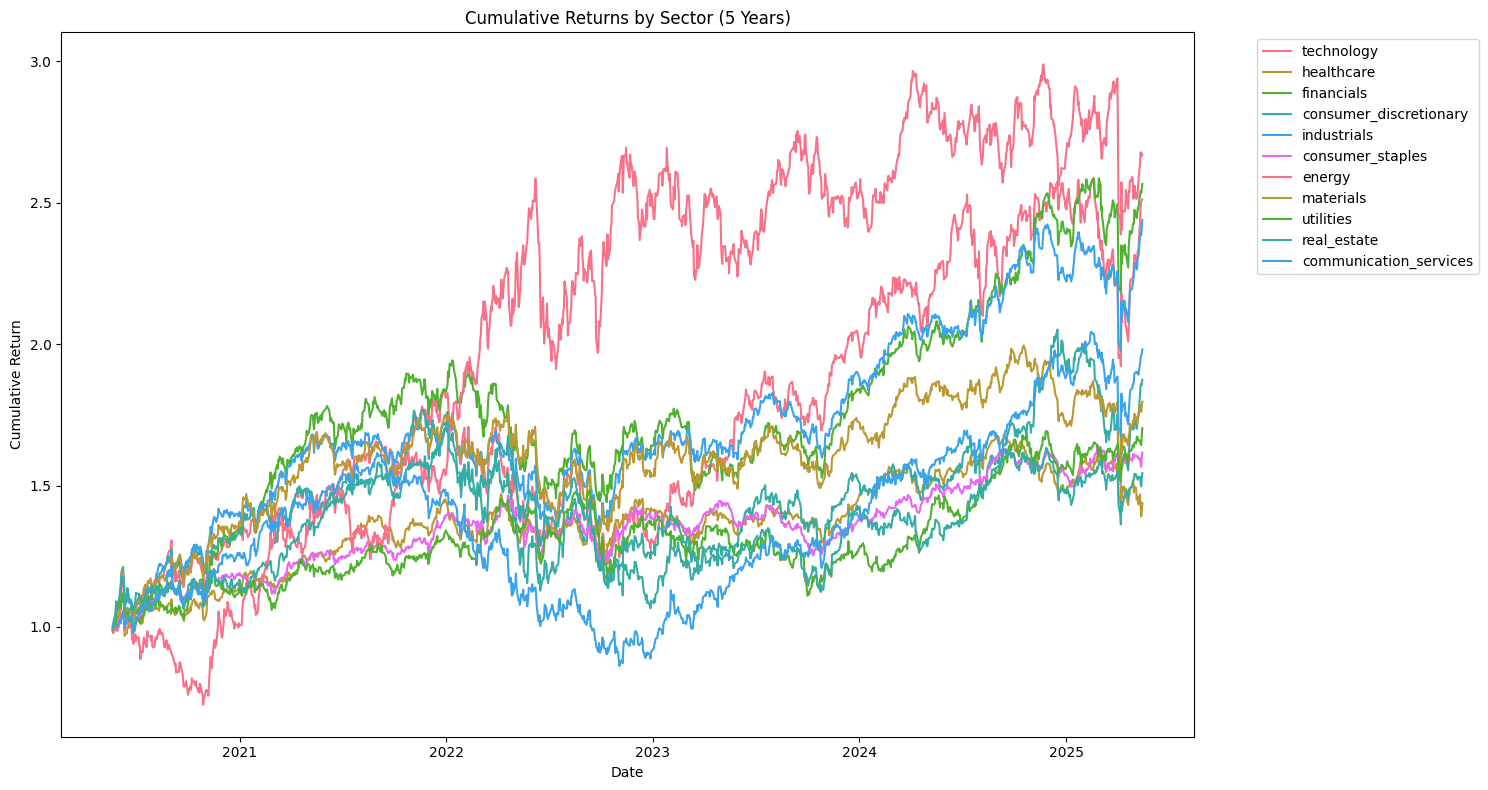

In [8]:
# Plot cumulative returns
plt.figure(figsize=(15, 8))
for sector, data in sector_data.items():
    cumulative_returns = (1 + data['Close'].pct_change()).cumprod()
    plt.plot(cumulative_returns.index, cumulative_returns, label=sector)

plt.title('Cumulative Returns by Sector (5 Years)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

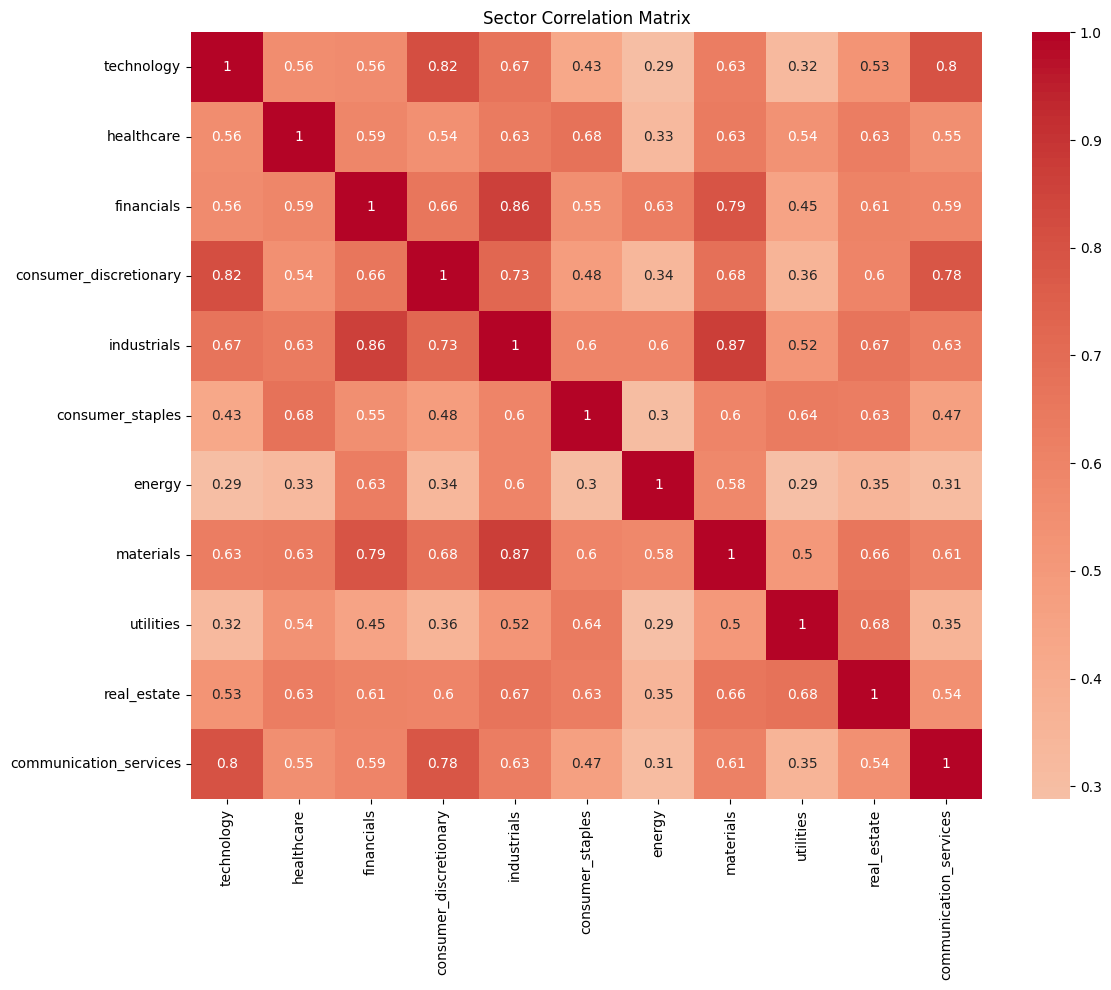

In [9]:
# Calculate correlation matrix
returns_data = pd.DataFrame()
for sector, data in sector_data.items():
    returns_data[sector] = data['Close'].pct_change()

correlation_matrix = returns_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Sector Correlation Matrix')
plt.tight_layout()
plt.show()

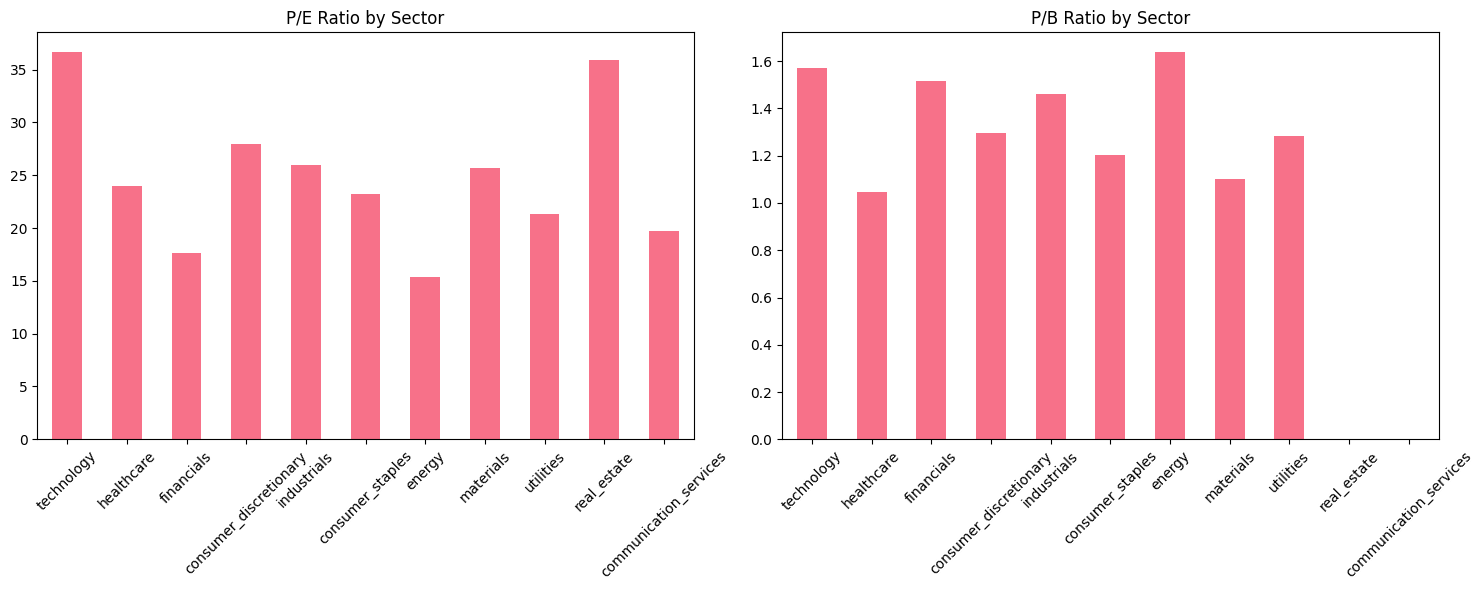

In [10]:
# Get current valuations for each sector ETF
valuations = {}
for sector, etf in sector_etfs.items():
    ticker = yf.Ticker(etf)
    info = ticker.info
    valuations[sector] = {
        'pe_ratio': info.get('trailingPE', None),
        'pb_ratio': info.get('priceToBook', None),
        'dividend_yield': info.get('dividendYield', None)
    }

valuations_df = pd.DataFrame(valuations).T

# Plot valuations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

valuations_df['pe_ratio'].plot(kind='bar', ax=ax1)
ax1.set_title('P/E Ratio by Sector')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

valuations_df['pb_ratio'].plot(kind='bar', ax=ax2)
ax2.set_title('P/B Ratio by Sector')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

C:\Users\Alvin Lui\AppData\Local\Temp\ipykernel_9996\149666792.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (metrics_df['volatility'][i], metrics_df['annualized_return'][i]),


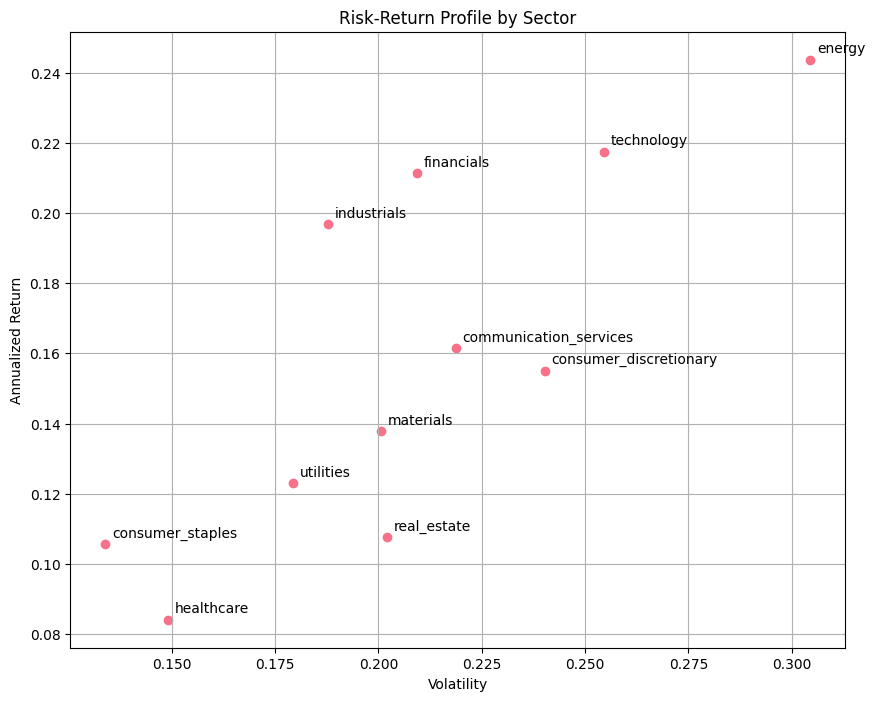

In [11]:
# Plot risk-return scatter
plt.figure(figsize=(10, 8))
plt.scatter(metrics_df['volatility'], metrics_df['annualized_return'])

for i, sector in enumerate(metrics_df.index):
    plt.annotate(sector, 
                (metrics_df['volatility'][i], metrics_df['annualized_return'][i]),
                xytext=(5, 5), textcoords='offset points')

plt.title('Risk-Return Profile by Sector')
plt.xlabel('Volatility')
plt.ylabel('Annualized Return')
plt.grid(True)
plt.show()